In [48]:
# import required modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import load

In [49]:
# Loaded cleaned DataFrame
loaded_df = load('cleaned_dataframe.joblib')

In [50]:
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749947 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 749947 non-null  object 
 1   Episode_Title                749947 non-null  float64
 2   Episode_Length_minutes       662860 non-null  float64
 3   Genre                        749947 non-null  object 
 4   Host_Popularity_percentage   749947 non-null  float64
 5   Publication_Day              749947 non-null  object 
 6   Publication_Time             749947 non-null  object 
 7   Guest_Popularity_percentage  749947 non-null  float64
 8   Number_of_Ads                749947 non-null  float64
 9   Episode_Sentiment            749947 non-null  object 
 10  Listening_Time_minutes       749947 non-null  float64
dtypes: float64(6), object(5)
memory usage: 68.7+ MB


In [51]:
# Replacing Podcast_Name with Top_Podcast
top_10_podcasts = loaded_df['Podcast_Name'].value_counts().head(10).index.tolist()
loaded_df['Top_Podcast'] = loaded_df['Podcast_Name'].apply(lambda x: 1.0 if x in top_10_podcasts else 0.0)
loaded_df = loaded_df.drop(columns=['Podcast_Name'])


DataFrame info after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 749947 entries, 0 to 749999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Title                749947 non-null  float64
 1   Episode_Length_minutes       662860 non-null  float64
 2   Host_Popularity_percentage   749947 non-null  float64
 3   Guest_Popularity_percentage  749947 non-null  float64
 4   Number_of_Ads                749947 non-null  float64
 5   Listening_Time_minutes       749947 non-null  float64
 6   Top_Podcast                  749947 non-null  float64
 7   Genre_Business               749947 non-null  bool   
 8   Genre_Comedy                 749947 non-null  bool   
 9   Genre_Education              749947 non-null  bool   
 10  Genre_Health                 749947 non-null  bool   
 11  Genre_Lifestyle              749947 non-null  bool   
 12  Genre_Music                  74

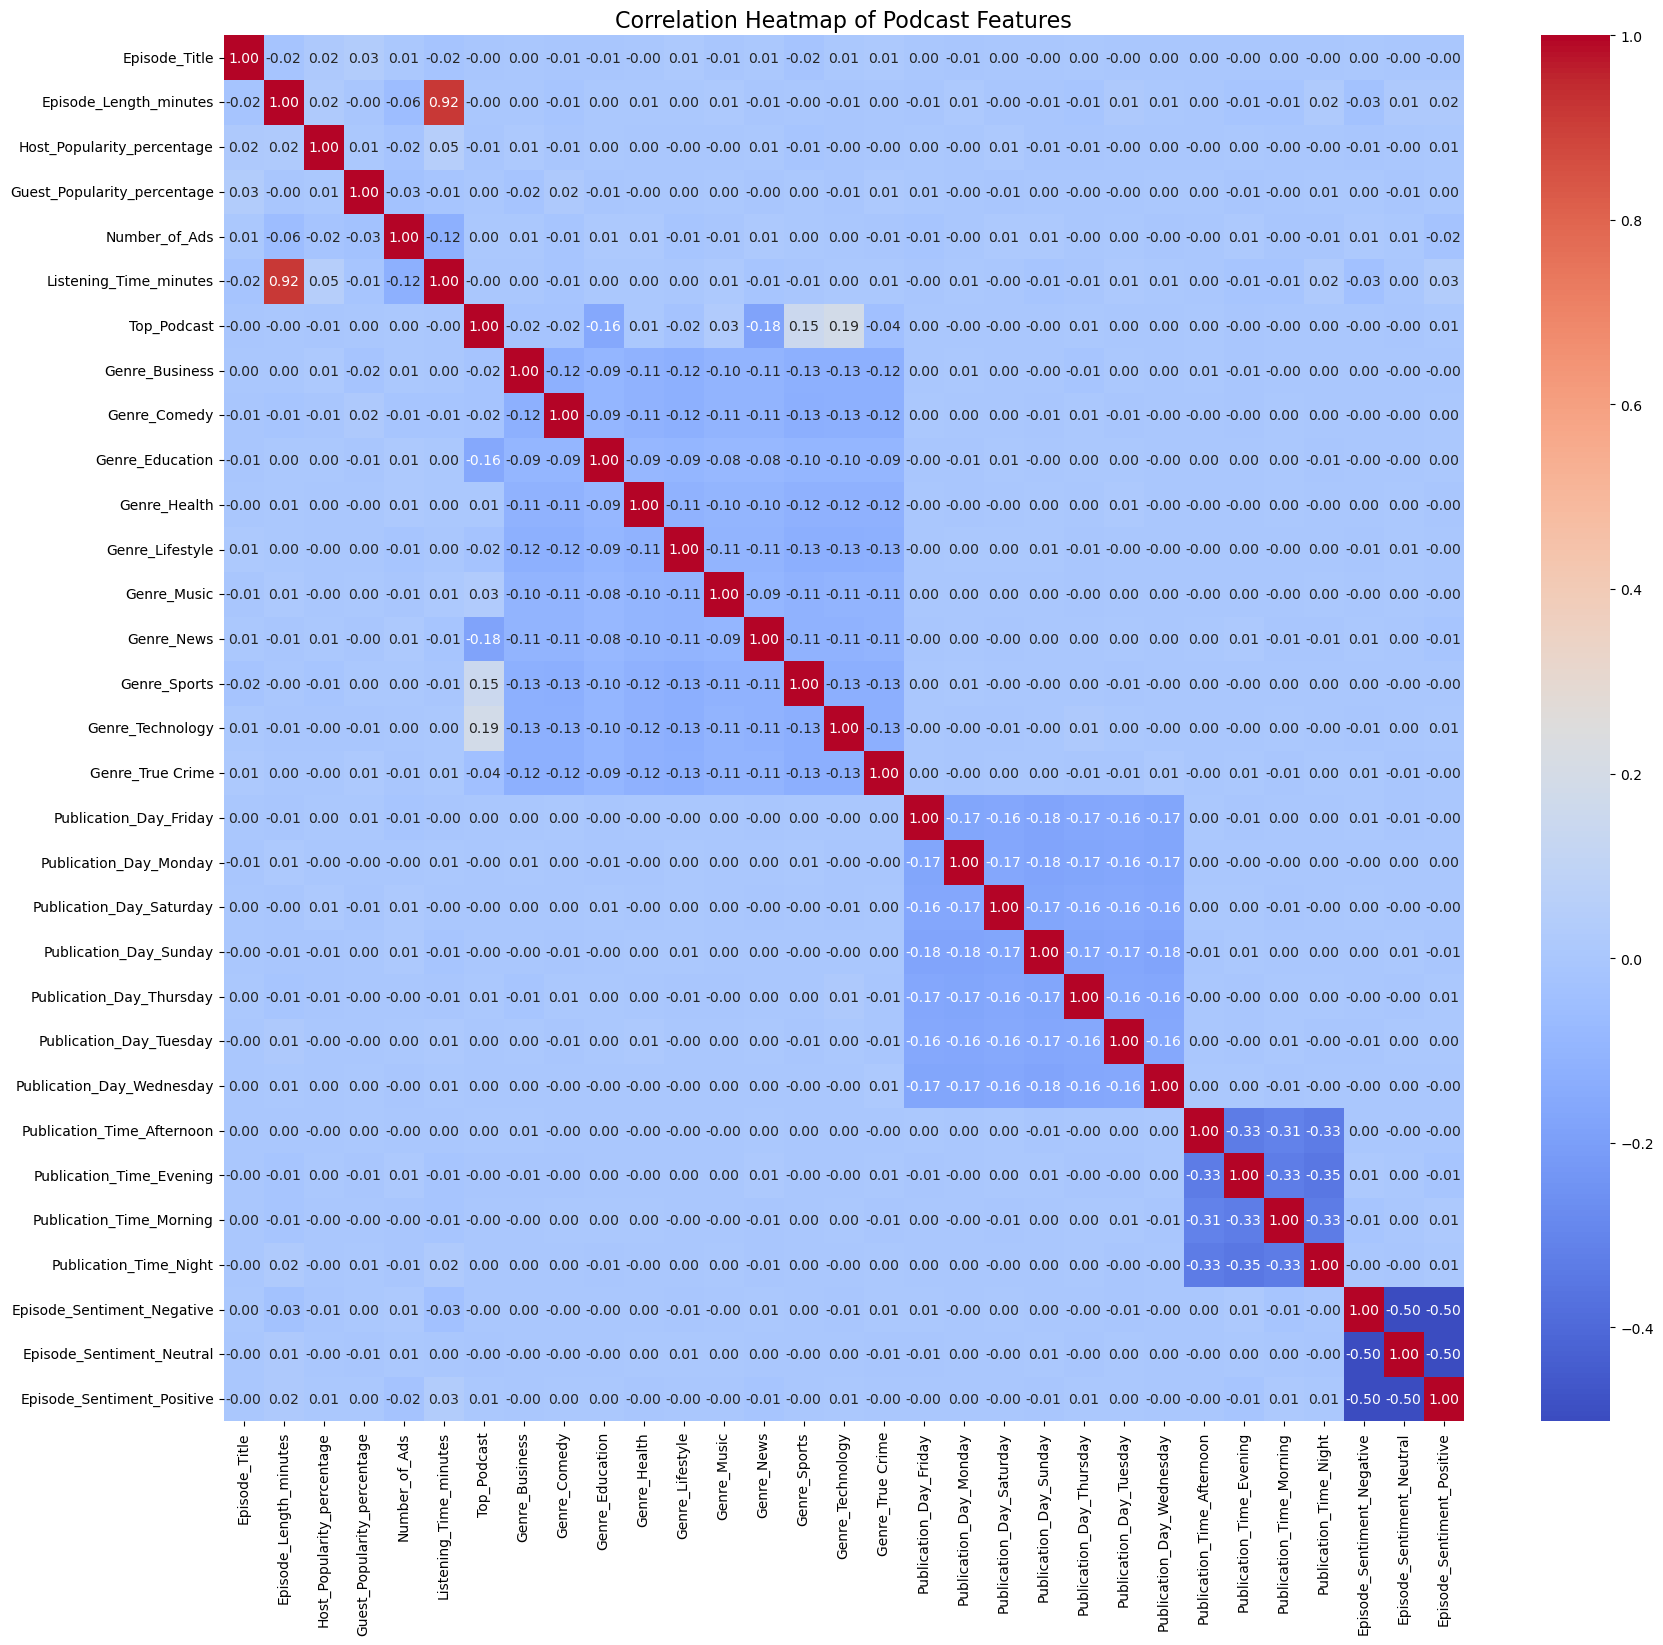

In [52]:
# Convert Categorical Columns to Numerical using One-Hot Encoding
categorical_cols = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
df_encoded = pd.get_dummies(loaded_df, columns=categorical_cols, prefix=categorical_cols, dummy_na=False)

print("\nDataFrame info after encoding:")
df_encoded.info()
print("\nFirst 5 rows of encoded DataFrame:")
print(df_encoded.head())

# Step 3: Create the Correlation Matrix
correlation_matrix = df_encoded.corr()

# Step 4: Visualize the Heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Podcast Features', fontsize=16)
plt.show()

There are a lot of weak correlations. A linear model might not best capture these relationships.